# Détection de la Fraude par Carte de Crédit

Dans ce projet, nous nous concentrons sur la détection de la fraude par carte de crédit en utilisant différentes techniques de modélisation. Avant d'entrer dans les détails des algorithmes, explorons chaque étape du processus.

## 1. Importation des bibliothèques nécessaires

Pour commencer, importons les bibliothèques Python nécessaires pour ce projet. Ces bibliothèques incluent Pandas pour la manipulation des données, NumPy pour les opérations numériques, Seaborn et Matplotlib pour la visualisation, et divers modules de scikit-learn pour les modèles de machine learning.

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

## 2. Collecte et exploration des données

### 2.1. Collecte des données

Nous commençons par charger le jeu de données à partir d'un fichier CSV. Supprimons également toute colonne superflue pour simplifier l'exploration et le traitement des données.

In [48]:

df = pd.read_csv("fraud_credit_card.csv") # Chargement du jeu de données
df = df.drop('id', axis=1) # Suppression de la colonne superflue pour l'exploration et le traitement

print("Nombre de données dans un fichier CSV :\n", len(df))

print("Valeurs non manquantes :\n", df.count())

Nombre de données dans un fichier CSV :
 568630
Valeurs non manquantes :
 V1        568630
V2        568630
V3        568630
V4        568630
V5        568630
V6        568630
V7        568630
V8        568630
V9        568630
V10       568630
V11       568630
V12       568630
V13       568630
V14       568630
V15       568630
V16       568630
V17       568630
V18       568630
V19       568630
V20       568630
V21       568630
V22       568630
V23       568630
V24       568630
V25       568630
V26       568630
V27       568630
V28       568630
Amount    568630
Class     568630
dtype: int64


### 2.2. Exploration des données

In [49]:
# Affichage des colonnes, types de données, cinq premières lignes et statistiques récapitulatives

print("Colonnes du DataFrame :\n" ,df.columns)

print("Types de données :\n" ,df.dtypes)

print("Nombre de colonnes par type de données :\n" ,df.dtypes.value_counts())

print("Cinq premières lignes du DataFrame :\n" ,df.head())

print("Statistiques récapitulatives :\n" ,df.describe())

Colonnes du DataFrame :
 Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')
Types de données :
 V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Nombre de colonnes par type de données :
 float64    29
int64       1
Name: count, dtype: int64
Cinq premières lignes du DataFrame :
          V1      

Notre dataset possède 30 colonnes possédant des données de type float et la colonne d'index est de type entier. Elle possède 568630 expériences ou enregistrements.

### 2.3 Détection de duplicatas

In [50]:
duplicates = df[df.duplicated()]

if duplicates.empty:
    print("Aucun duplicata trouvé.")
else:
    print("Duplicatas détectés. Voici les lignes en double :\n", duplicates)

Duplicatas détectés. Voici les lignes en double :
               V1        V2        V3        V4        V5        V6        V7  \
510531 -1.704517  2.599199 -1.205391  0.503527 -0.949674  3.226002 -2.323095   

              V8        V9       V10  ...      V21       V22       V23  \
510531 -6.027712  0.273389 -0.698893  ...  8.08708 -6.450353  6.343132   

             V24       V25       V26       V27       V28    Amount  Class  
510531 -1.075048  0.349881 -0.240261  1.534445  2.154102  22549.29      1  

[1 rows x 30 columns]


### 2.4 Répartition des caractéristiques selon la fraude et la non-fraude

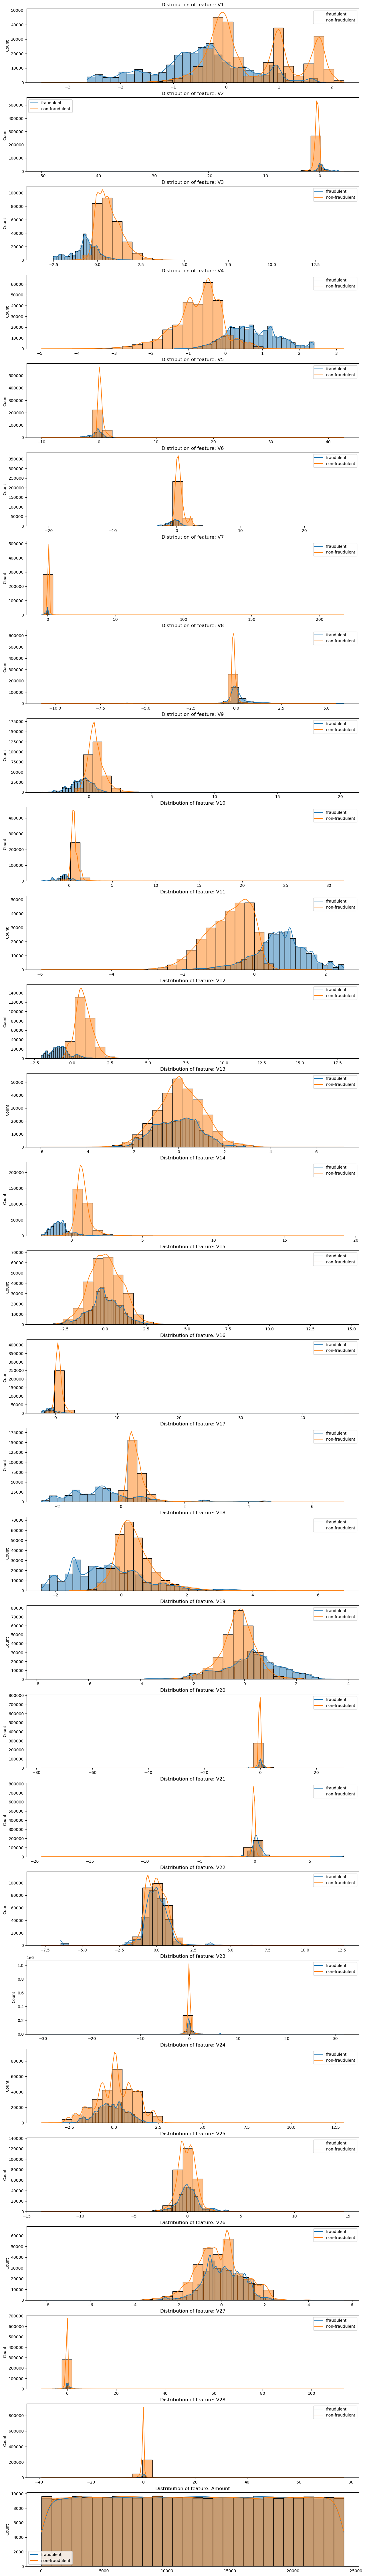

In [51]:
# Affichage des histogrammes pour différentes caractéristiques

features=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
nplots=np.size(features) # nombre de plots
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1) # nplots sur 1 colonne 
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(df[feat][df.Class==1], bins=30, kde=True)
    sns.histplot(df[feat][df.Class==0],bins=30, kde=True) #quand le non_fraudulent ne s'affiche pas correctement, il faut changer 0 par -1
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

### 2.5 Matrice de corrélation

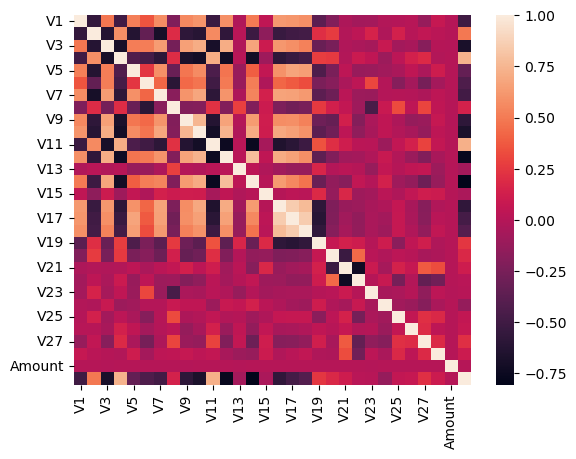

In [52]:
corr = df.corr()
sns.heatmap(corr)
plt.show()

L'écart-type présenté dans les résultats précédents indique que les caractéristiques, de V1 à V28, sont de plus en plus homogènes. Les valeurs de ces dimensions sont centrées autour de zéro et montrent une dispersion relativement uniforme, ce qui suggère une normalisation des données. Cette homogénéité facilite souvent l'entraînement des modèles d'apprentissage automatique, car elle réduit les disparités d'échelle entre les caractéristiques

## 3. Prétraitement des données

In [53]:
# Gestion des valeurs manquantes
print("Nombre des valeurs manquantes :\n", df.isnull().values.sum())

Nombre des valeurs manquantes :
 0


Le dataset ne possède pas de valeur manquantes

Remplacement des valeurs manquantes par la médiane de chaque colonne

In [54]:
# 1ere methode possible:
df = df.fillna(df.median())  # Remplace les valeurs manquantes par la médiane de chaque colonne

In [ ]:
# 2eme methode possible: (Ne pas executer les 2 methodes en meme temps)
df = df.fillna(df.mean(), inplace=True)  # Remplace les valeurs manquantes par la moyenne

In [55]:
# Normaliser les caractéristiques
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)  # Normalise les caractéristiques

## 4. Séparation des données

In [56]:
df_0=df[df.Class==-1]    # Ensemble de données contenant uniquement des données non frauduleuses 
print("Taille de df_0 :", len(df_0))

df_1=df[df.Class==1]    # Ensemble de données avec uniquement des fraudes
print("Taille de df_1 :", len(df_1))

print(df['Class'].value_counts()) # Autre maniere de verification

Taille de df_0 : 284315
Taille de df_1 : 284315
Class
-1.0    284315
 1.0    284315
Name: count, dtype: int64


In [57]:
df_0.Amount.describe()

count    284315.000000
mean         -0.002261
std           1.001425
min          -1.733015
25%          -0.868169
50%          -0.006512
75%           0.866853
max           1.733902
Name: Amount, dtype: float64

In [58]:
df_1.Amount.describe()

count    284315.000000
mean          0.002261
std           0.998571
min          -1.733031
25%          -0.862374
50%           0.002961
75%           0.865916
max           1.733902
Name: Amount, dtype: float64

In [59]:
# comparaison des valeurs pour les deux transactions
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
-1.0,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,0.673665,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,-0.002261
1.0,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,-0.673665,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,0.002261


Division des données non frauduleuses en ensembles d'entraînement et de test

In [ ]:
# Répartir les données non frauduleuses en 80 % pour l'apprentissage et en 20 % pour la validation croisée et les tests.

X = df.drop('Class', axis=1)  # Supprime la colonne 'Class' pour créer l'ensemble des caractéristiques
y = df['Class']  # Utilise la colonne 'Class' comme cibles

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Divise les données en ensembles d'entraînement et de test

In [60]:
# Définir le sous-ensemble de données à utiliser pour l'entrainement et le test
subset_size = 100000
df_subset = df.iloc[:subset_size, :]

# Répartir les données non frauduleuses en 80 % pour l'apprentissage et en 20 % pour la validation croisée et les tests.
X = df_subset.drop('Class', axis=1)
y = df_subset['Class']

# Diviser le sous-ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 5. Modèles de classification

### 5.1  Régression logistique

In [61]:
logreg_model = LogisticRegression(solver="liblinear")  # Utilise la régression logistique comme modèle de classification 

a. Optimisation des hyperparamètres

In [62]:
# Utilisation de GridSearchCV pour trouver les meilleurs hyperparamètres
c_space = np.logspace(-5, 8, 15)
param_grid_logreg = {'C': c_space, 'penalty': ['l1', 'l2']} # Définit les paramètres à tester
logreg_cv = GridSearchCV(logreg_model, param_grid_logreg, cv=5) # Crée un objet GridSearchCV
logreg_cv.fit(X_train, y_train) # Exécute la recherche sur grille pour une optimisation plus poussée

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']})

b. Affichage des paramètres accordés et du meilleur score

In [63]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) # Affiche les meilleurs paramètres
print("Best score is {}".format(logreg_cv.best_score_)) # Affiche les meilleurs scores

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327, 'penalty': 'l2'}
Best score is 0.999225


### 5.2 KNN


In [64]:
knn_model = KNeighborsClassifier() # Utilise le knn comme modèle de classification

a. Optimisation des hyperparamètres

In [65]:
# Utilisation de GridSearchCV pour trouver les meilleurs hyperparamètres
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_cv = GridSearchCV(knn_model, param_grid_knn, cv=5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

b. Affichage des paramètres accordés et du meilleur score

In [66]:
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))

Tuned KNN Parameters: {'n_neighbors': 3}
Best score is 0.9994


### 5.3 SVM 

In [67]:
svm_model = SVC(kernel='linear') #Utilise le SVM comme modèle de classification

a. Optimisation des hyperparamètres

In [68]:
# Utilisation de GridSearchCV pour trouver les meilleurs hyperparamètres
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_cv = GridSearchCV(svm_model, param_grid_svm, cv=5)
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

b. Affichage des paramètres accordés et du meilleur score

In [69]:
print("Tuned SVM Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))

Tuned SVM Parameters: {'C': 10, 'kernel': 'rbf'}
Best score is 0.9994875000000001


### 5.4 Random Forest

In [70]:
rfc_model = RandomForestClassifier() # Utilise la forêt d'arbres décisionnels comme modèle de classification

a. Optimisation des hyperparamètres

In [71]:
# Utilisation de GridSearchCV pour trouver les meilleurs hyperparamètres
parameters_rfc = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30]}
rfc_cv = GridSearchCV(rfc_model, parameters_rfc, cv=5)
rfc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [10, 50, 100]})

b. Affichage des paramètres accordés et du meilleur score

In [72]:
print("Tuned Random Forest Parameters: {}".format(rfc_cv.best_params_))  # Affiche les meilleurs paramètres

print("Best score is {}".format(rfc_cv.best_score_)) # Affiche les meilleurs scores

Tuned Random Forest Parameters: {'max_depth': 10, 'n_estimators': 50}
Best score is 0.9995499999999999


### Choix du modele


Pour choisir un modèle de classification, il faut tenir compte du contexte et des caractéristiques des données. Dans le cas de la détection de fraude :

Régression Logistique :

 La régression logistique est adaptée aux problèmes de classification binaire comme la détection de fraude. Elle est rapide, efficace et facile à interpréter avec un score remarquable des hyperparamètres optimaux avec GridSearchCV (AUC = 0.9992).

SVM :

 Les SVM sont performants pour la classification, surtout quand les données sont complexes. Il a aussi atteint un score remarquable (Best score is 0.9995).
Inconvénient : Les SVM est lents à entraîner, surtout sur des données volumineuses (notre cas: +550 000 données).

Random Forest :

 Le modèle Random Forest a aussi atteint un score remarquable (Best score is 0.9995). Il est robuste, gère bien les données déséquilibrées et a des mécanismes intégrés pour éviter le surapprentissage.

En résumé, les modèles Random Forest et SVM sont tous de bons candidats, avec chacun leurs points forts.

## 6. Évaluation des modèles

In [73]:
def plot_confusion_matrix(y_true, y_pred, labels=["Non Fraude", "Fraude"]):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Matrice de Confusion")
    plt.xlabel("Classe Prédite")
    plt.ylabel("Classe Réelle")
    plt.show()

### 6.1 Evaluation du modéle : Régression logistique

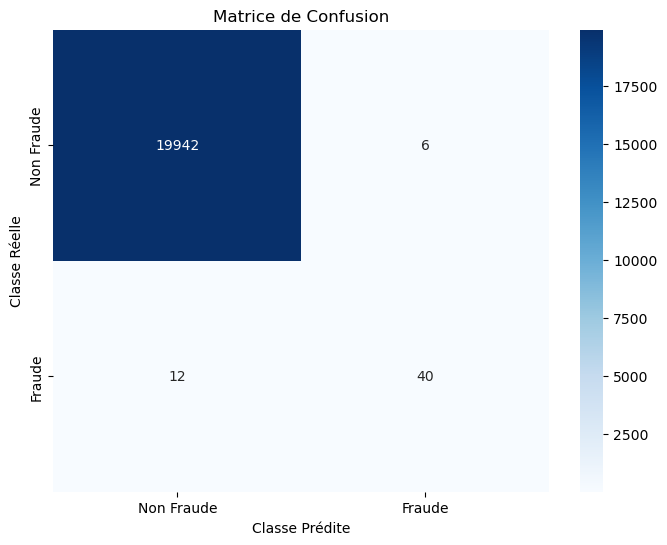

In [74]:
y_pred_logreg = logreg_cv.best_estimator_.predict(X_test)  # Utilise le modèle pour faire des prédictions sur l'ensemble de test

conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

specificity_logreg = conf_matrix_logreg[0, 0] / (conf_matrix_logreg[0, 0] + conf_matrix_logreg[0, 1])

plot_confusion_matrix(y_test, y_pred_logreg, labels=["Non Fraude", "Fraude"])

In [75]:
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))  # Calcule et affiche la précision du modèle
print("Recall:", recall_score(y_test, y_pred_logreg))  # Calcule et affiche la sensibilité (taux de vrais positifs) du modèle
print("Specificity:", specificity_logreg) #Calcul et affiche la spécificité (taux de vrais négatifs) du modèle
print("F1 Score:", f1_score(y_test, y_pred_logreg))  # Calcule et affiche le score F1 du modèle

print("Classification Report:\n", classification_report(y_test, y_pred_logreg)) # Affiche le rapport de classification

Accuracy: 0.9991
Recall: 0.7692307692307693
Specificity: 0.9996992179667135
F1 Score: 0.8163265306122449
Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     19948
         1.0       0.87      0.77      0.82        52

    accuracy                           1.00     20000
   macro avg       0.93      0.88      0.91     20000
weighted avg       1.00      1.00      1.00     20000



AUC: 0.9774847295275408
AUC scores computed using 5-fold cross-validation: [0.99497531 0.98336454 0.99298533 0.94630029 0.96320499]

FPR
: [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.50391017e-04
 1.50391017e-04 2.00521356e-04 2.00521356e-04 2.50651694e-04
 2.50651694e-04 3.00782033e-04 3.00782033e-04 3.05795067e-03
 3.05795067e-03 3.50912372e-03 3.50912372e-03 7.26889914e-03
 7.26889914e-03 7.77020253e-03 7.77020253e-03 9.57489473e-03
 9.57489473e-03 1.01263285e-02 1.01263285e-02 2.54662122e-02
 2.54662122e-02 7.51453780e-02 7.51453780e-02 8.01584119e-02
 8.01584119e-02 9.10366954e-02 9.10366954e-02 4.03198316e-01
 4.03198316e-01 4.47162623e-01 4.47162623e-01 1.00000000e+00]

TPR
: [0.         0.01923077 0.25       0.25       0.26923077 0.26923077
 0.34615385 0.34615385 0.44230769 0.44230769 0.76923077 0.76923077
 0.78846154 0.78846154 0.80769231 0.80769231 0.82692308 0.82692308
 0.84615385 0.84615385 0.86538462 0.86538462 0.88461538 0.88461538
 0.90384615 0.90384615 0.92307692 0.

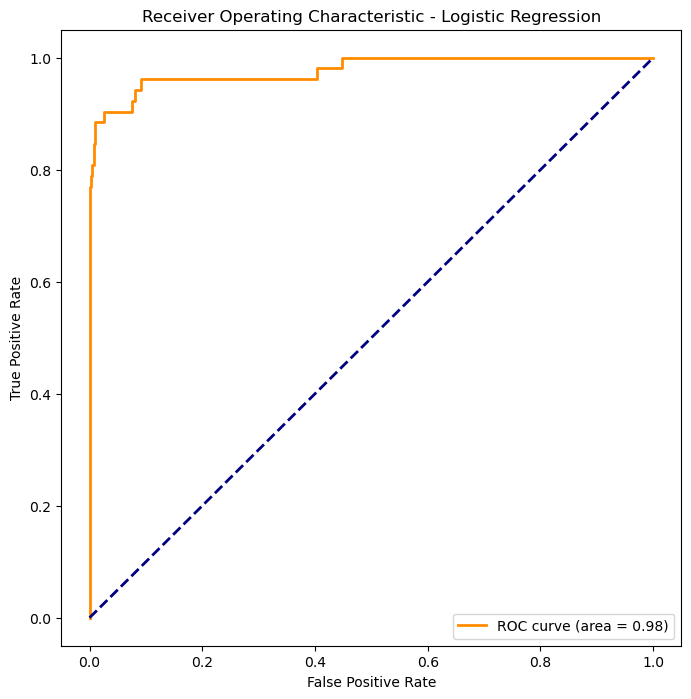

In [76]:
# Prédiction des probabilités
y_prob_logreg = logreg_cv.predict_proba(X_test)[:, 1]

# # Calcul et affichage du score AUC
print("AUC: {}".format(roc_auc_score(y_test, y_prob_logreg)))

# Calcul des scores AUC avec validation croisée : cv_auc
cv_auc =  cross_val_score(logreg_cv, X, y, cv=5, scoring='roc_auc')

# Affichage de la liste des scores AUC
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Calcul des valeurs ROC
fpr_logreg, tpr_logreg, seuils_logreg = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

print("\nFPR\n: {}".format(fpr_logreg))
print("\nTPR\n: {}".format(tpr_logreg))

# Affichage de la courbe ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_logreg))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

### Interpretation

Accuracy:
L'exactitude est élevée à 99.91%, indiquant une performance globalement satisfaisante du modèle. Cependant, il est important de noter que l'exactitude seule peut être trompeuse, surtout en présence de classes déséquilibrées.

Recall:
Le rappel, mesurant la capacité du modèle à détecter les fraudes, est de 76.92%. Bien que raisonnable, il y a une marge d'amélioration pour identifier davantage de vrais positifs, c'est-à-dire les cas de fraude réels. Un rappel plus élevé serait souhaitable pour minimiser les faux négatifs.

Spécificité:
La spécificité est élevée à 99.97%, indiquant que le modèle est performant dans la détection des vrais négatifs, c'est-à-dire les transactions non frauduleuses. Cela suggère une capacité à minimiser les faux positifs.

AUC:
L'aire sous la courbe ROC (AUC) est de 97.75%, confirmant la bonne capacité de discrimination du modèle. Une AUC élevée indique que le modèle est efficace pour distinguer entre les transactions frauduleuses et non frauduleuses.

### 6.2 Evaluation du modéle : KNN

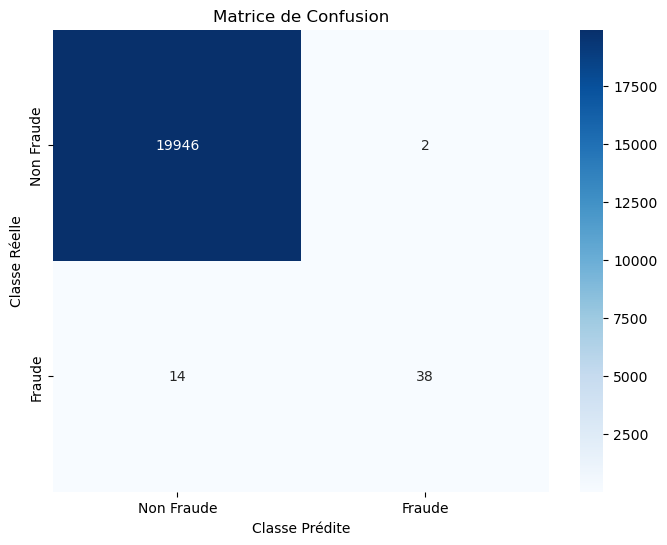

In [77]:
y_pred_knn = knn_cv.best_estimator_.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

specificity_knn = conf_matrix_knn[0, 0] / (conf_matrix_knn[0, 0] + conf_matrix_knn[0, 1])

plot_confusion_matrix(y_test, y_pred_knn, labels=["Non Fraude", "Fraude"])

In [78]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))  # Calcule et affiche la précision du modèle
print("Recall:", recall_score(y_test, y_pred_knn))  # Calcule et affiche la sensibilité (taux de vrais positifs) du modèle
print("Specificity (True Negative Rate):", specificity_knn) #Calcul et affiche la spécificité (taux de vrais négatifs) du modèle
print("F1 Score:", f1_score(y_test, y_pred_knn))  # Calcule et affiche le score F1 du modèle

print("Classification Report:\n", classification_report(y_test, y_pred_knn)) # Affiche le rapport de classification

Accuracy: 0.9992
Recall: 0.7307692307692307
Specificity (True Negative Rate): 0.9998997393222379
F1 Score: 0.8260869565217392
Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     19948
         1.0       0.95      0.73      0.83        52

    accuracy                           1.00     20000
   macro avg       0.97      0.87      0.91     20000
weighted avg       1.00      1.00      1.00     20000



AUC : 0.9037555336181765
Scores AUC calculés avec une validation croisée à 5 volets : [0.93082167 0.71566879 0.84422896 0.79991425 0.87769259]

FPR
: [0.00000000e+00 5.01303389e-05 1.00260678e-04 4.51173050e-04
 1.00000000e+00]

TPR
: [0.         0.57692308 0.73076923 0.80769231 1.        ]


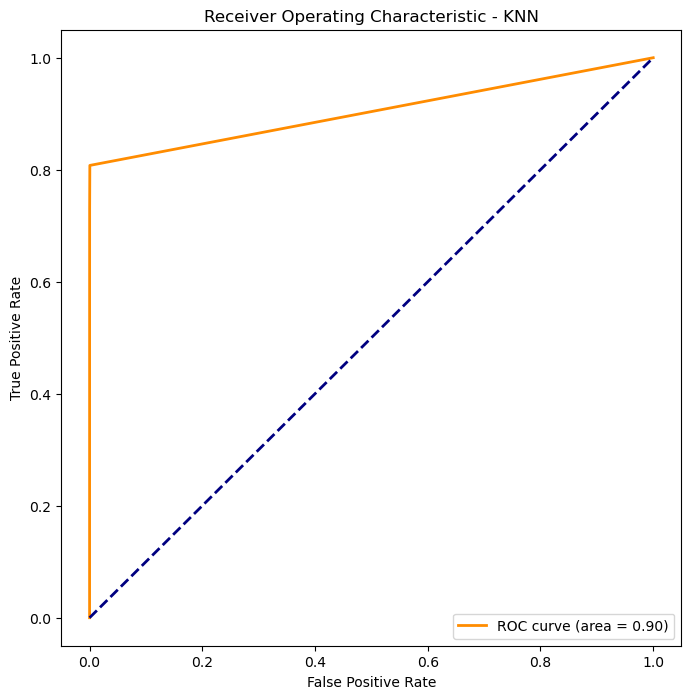

In [79]:
# Prédiction des probabilités
y_prob_knn = knn_cv.predict_proba(X_test)[:, 1]

# Calcul et affichage du score AUC
print("AUC : {}".format(roc_auc_score(y_test, y_prob_knn)))

# Calcul des scores AUC avec validation croisée : cv_auc
cv_auc_knn =  cross_val_score(knn_cv.best_estimator_, X, y, cv=5, scoring='roc_auc')

# Affichage de la liste des scores AUC
print("Scores AUC calculés avec une validation croisée à 5 volets : {}".format(cv_auc_knn))

# Calcul des valeurs ROC
fpr_knn, tpr_knn, seuils_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

print("\nFPR\n: {}".format(fpr_knn))
print("\nTPR\n: {}".format(tpr_knn))

# Affichage de la courbe ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc='lower right')
plt.show()

### Interpretation

Accuracy:
Le modèle KNN affiche une précision de 99.92%, suggérant une performance globalement solide.

Recall:
Cependant, le rappel à 73.08% indique une détection moins sensible des fraudes par rapport à d'autres modèles.

Spécificité:
La spécificité est très élevée à 99.99%, montrant une excellente capacité à détecter les transactions non frauduleuses.

AUC:
L'AUC de 90.38% est respectable mais suggère une amélioration potentielle dans la capacité de discrimination du modèle.

### 6.3 Evaluation du modéle : SVM

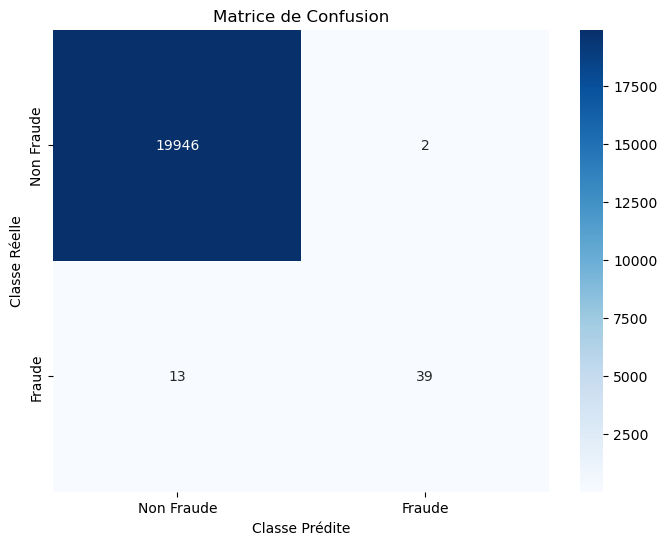

In [80]:
y_pred_svm = svm_cv.best_estimator_.predict(X_test)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

specificity_svm = conf_matrix_svm[0, 0] / (conf_matrix_svm[0, 0] + conf_matrix_svm[0, 1])

plot_confusion_matrix(y_test, y_pred_svm, labels=["Non Fraude", "Fraude"])

In [81]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))  # Calcule et affiche la précision du modèle
print("Recall:", recall_score(y_test, y_pred_svm))  # Calcule et affiche la sensibilité (taux de vrais positifs) du modèle
print("Specificity (True Negative Rate):", specificity_svm) #Calcul et affiche la spécificité (taux de vrais négatifs) du modèle
print("F1 Score:", f1_score(y_test, y_pred_svm))  # Calcule et affiche le score F1 du modèle

print("Classification Report:\n", classification_report(y_test, y_pred_svm)) # Affiche le rapport de classification

Accuracy: 0.99925
Recall: 0.75
Specificity (True Negative Rate): 0.9998997393222379
F1 Score: 0.8387096774193549
Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     19948
         1.0       0.95      0.75      0.84        52

    accuracy                           1.00     20000
   macro avg       0.98      0.87      0.92     20000
weighted avg       1.00      1.00      1.00     20000



AUC : 0.9699969921796671
Scores AUC calculés avec une validation croisée à 5 volets : [0.98393397 0.98538831 0.96176397 0.92672625 0.96806147]

FPR
: [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.01303389e-05
 5.01303389e-05 1.00260678e-04 1.00260678e-04 3.00782033e-04
 3.00782033e-04 4.01042711e-04 4.01042711e-04 5.01303389e-04
 5.01303389e-04 8.02085422e-04 8.02085422e-04 1.00260678e-03
 1.00260678e-03 2.55664728e-03 2.55664728e-03 1.80469220e-02
 1.80469220e-02 8.03088029e-02 8.03088029e-02 1.65480249e-01
 1.65480249e-01 5.78905153e-01 5.78905153e-01 7.10948466e-01
 7.10948466e-01 1.00000000e+00]

TPR
: [0.         0.01923077 0.51923077 0.51923077 0.71153846 0.71153846
 0.78846154 0.78846154 0.80769231 0.80769231 0.82692308 0.82692308
 0.84615385 0.84615385 0.86538462 0.86538462 0.88461538 0.88461538
 0.90384615 0.90384615 0.92307692 0.92307692 0.94230769 0.94230769
 0.96153846 0.96153846 0.98076923 0.98076923 1.         1.        ]


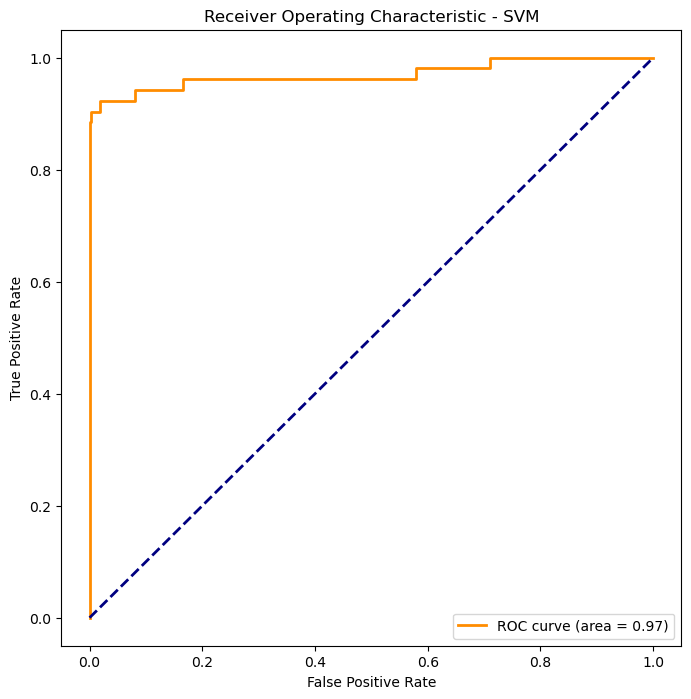

In [82]:
# Prédiction des probabilités
y_prob_svm = svm_cv.decision_function(X_test)

# Calcul et affichage du score AUC
print("AUC : {}".format(roc_auc_score(y_test, y_prob_svm)))

# Calcul des scores AUC avec validation croisée : cv_auc
cv_auc_svm =  cross_val_score(svm_cv.best_estimator_, X, y, cv=5, scoring='roc_auc')

# Affichage de la liste des scores AUC
print("Scores AUC calculés avec une validation croisée à 5 volets : {}".format(cv_auc_svm))

# Calcul des valeurs ROC
fpr_svm, tpr_svm, seuils_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

print("\nFPR\n: {}".format(fpr_svm))
print("\nTPR\n: {}".format(tpr_svm))

# Affichage de la courbe ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc='lower right')
plt.show()

### Interpretation

Accuracy:
Le modèle SVM affiche une précision de 99.93%, indiquant une performance globalement solide.

Recall:
Le rappel à 75.00% suggère une amélioration par rapport à la régression logistique, mais il y a encore de la place pour détecter davantage de cas de fraude.

Spécificité:
La spécificité est élevée à 99.99%, montrant une excellente capacité à détecter les transactions non frauduleuses.

AUC:
L'AUC de 97% confirme la bonne capacité de discrimination du modèle.

### 6.4 Evaluation du modéle : Random Forest

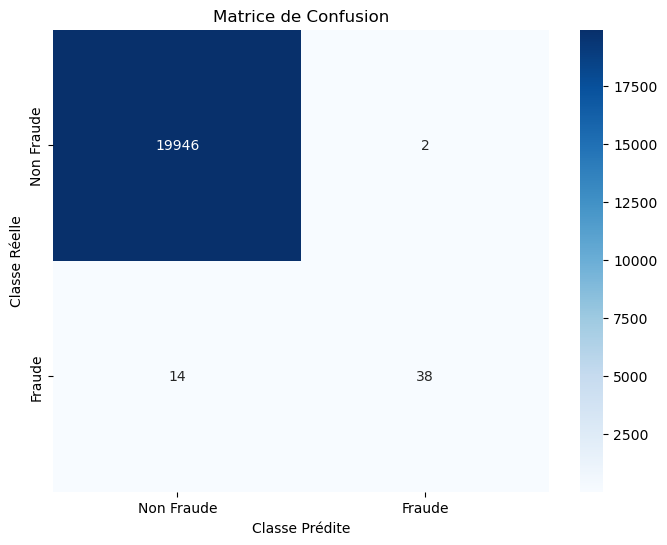

In [83]:
y_pred_rfc = knn_cv.best_estimator_.predict(X_test)

conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

specificity_rfc = conf_matrix_rfc[0, 0] / (conf_matrix_rfc[0, 0] + conf_matrix_rfc[0, 1])

plot_confusion_matrix(y_test, y_pred_rfc, labels=["Non Fraude", "Fraude"])

In [84]:
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))  # Calcule et affiche la précision du modèle
print("Recall:", recall_score(y_test, y_pred_rfc))  # Calcule et affiche la sensibilité (taux de vrais positifs) du modèle
print("Specificity (True Negative Rate):", specificity_rfc) #Calcul et affiche la spécificité (taux de vrais négatifs) du modèle
print("F1 Score:", f1_score(y_test, y_pred_rfc))  # Calcule et affiche le score F1 du modèle

print("Classification Report:\n", classification_report(y_test, y_pred_rfc)) # Affiche le rapport de classification

Accuracy: 0.9992
Recall: 0.7307692307692307
Specificity (True Negative Rate): 0.9998997393222379
F1 Score: 0.8260869565217392
Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     19948
         1.0       0.95      0.73      0.83        52

    accuracy                           1.00     20000
   macro avg       0.97      0.87      0.91     20000
weighted avg       1.00      1.00      1.00     20000



AUC : 0.9811225532538446
Scores AUC calculés avec une validation croisée à 5 volets : [0.98551529 0.99903424 0.992198   0.92931429 0.97187617]

FPR
: [0.         0.         0.         ... 0.99979948 0.99989974 1.        ]

TPR
: [0.         0.13461538 0.26923077 ... 1.         1.         1.        ]


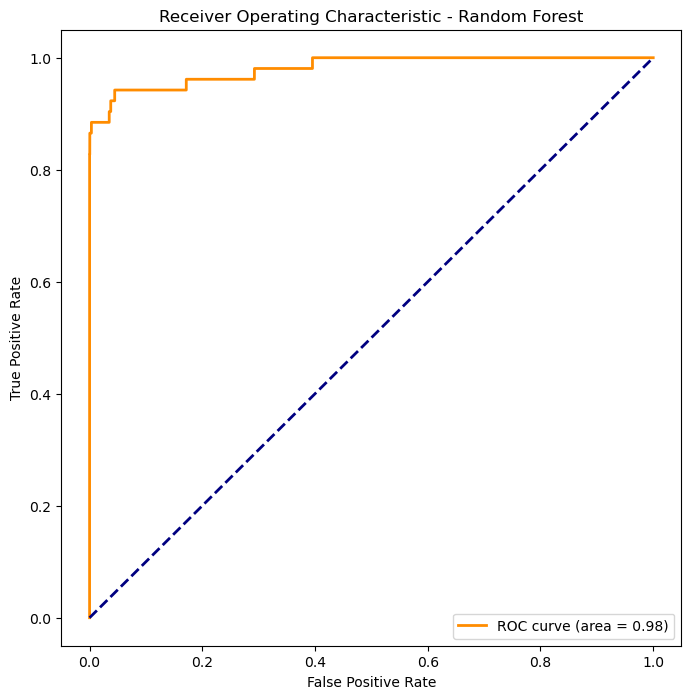

In [85]:
# Prédiction des probabilités
y_prob_rfc = rfc_cv.predict_proba(X_test)[:, 1]

# Calcul et affichage du score AUC
print("AUC : {}".format(roc_auc_score(y_test, y_prob_rfc)))

# Calcul des scores AUC avec validation croisée : cv_auc
cv_auc_rfc =  cross_val_score(rfc_cv.best_estimator_, X, y, cv=5, scoring='roc_auc')

# Affichage de la liste des scores AUC
print("Scores AUC calculés avec une validation croisée à 5 volets : {}".format(cv_auc_rfc))

# Calcul des valeurs ROC
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_prob_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

print("\nFPR\n: {}".format(fpr_rfc))
print("\nTPR\n: {}".format(tpr_rfc))

# Affichage de la courbe ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_rfc, tpr_rfc, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rfc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()

In [1]:
a = lambda x, y : x*y
print(a(7, 19))

133


### Interpretation 

Accuracy:
Le modèle Random Forest affiche une précision de 99.92%, similaire à d'autres modèles.

Recall:
Le rappel à 73.08% suggère une détection moins sensible des fraudes par rapport à certains autres modèles.

Spécificité:
La spécificité est très élevée à 99.99%, montrant une excellente capacité à détecter les transactions non frauduleuses.

AUC:
L'AUC de 98.11% est respectable mais suggère une amélioration potentielle dans la capacité de discrimination du modèle.

## 7. Analyse générale des resultats

Les quatre modèles montrent une capacité élevée à détecter les transactions non frauduleuses, comme en témoigne la spécificité élevée. Cependant, le rappel pour la détection de fraudes peut être amélioré dans tous les modèles, indiquant une certaine propension aux faux négatifs.

### Améliorations Suggérées :

- Équilibrage des Données : Envisager des stratégies pour équilibrer les classes et améliorer la sensibilité.
- Réglage des Hyperparamètres : Une optimisation plus poussée pourrait aider à ajuster les modèles pour de meilleures performances.
- Ensemble de Modèles : Explorer la création d'un ensemble de modèles pour tirer parti de la diversité des approches.
- Feature Engineering : Analyser et ajuster les caractéristiques pour une meilleure compréhension des modèles.
- Évaluation Continue : Surveiller les performances des modèles et les ajuster en fonction de l'évolution des données.